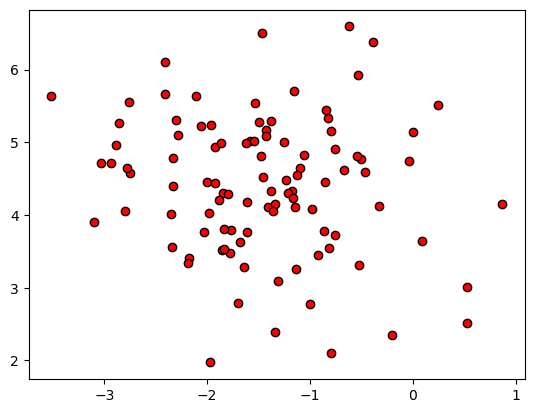

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
blobs = make_blobs(random_state=1,centers=1)
X_blobs = blobs[0]
plt.scatter(X_blobs[:,0],X_blobs[:,1],c='r',edgecolor='k')
plt.show()

D:\liuchaochao\DownLoad\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


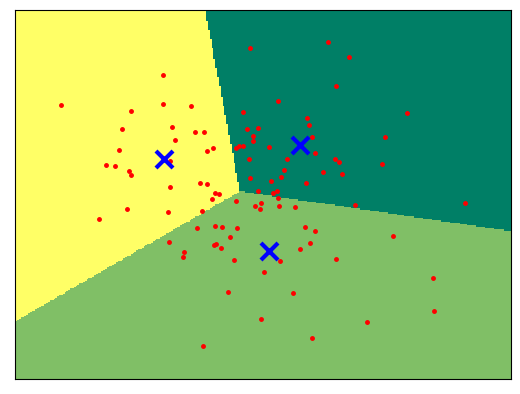

In [4]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_blobs)

#下面是用来画图的代码
x_min, x_max = X_blobs[:, 0].min()-0.5 , X_blobs[:, 0].max()+0.5 
y_min, y_max = X_blobs[:, 1].min()-0.5 , X_blobs[:, 1].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), 
                     np.arange(y_min, y_max, .02))


Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.summer,
           aspect='auto', origin='lower')

plt.plot(X_blobs[:, 0], X_blobs[:, 1], 'r.', markersize=5)
#用蓝色叉号代表聚类的中心
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=150, linewidths=3,
            color='b', zorder=10)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [5]:
print("K均值的聚类标签:\n{}".format(kmeans.labels_))

K均值的聚类标签:
[1 1 2 0 0 0 1 1 2 0 1 0 1 2 1 0 0 1 2 2 0 2 1 1 1 1 0 1 1 1 2 2 1 1 0 2 0
 2 1 2 0 1 2 2 0 0 0 1 2 1 2 1 0 2 0 1 2 0 0 1 0 2 0 1 2 0 2 2 1 0 0 1 0 0
 0 1 0 1 1 2 0 2 0 0 2 1 0 1 2 2 0 1 2 2 0 0 1 0 0 1]


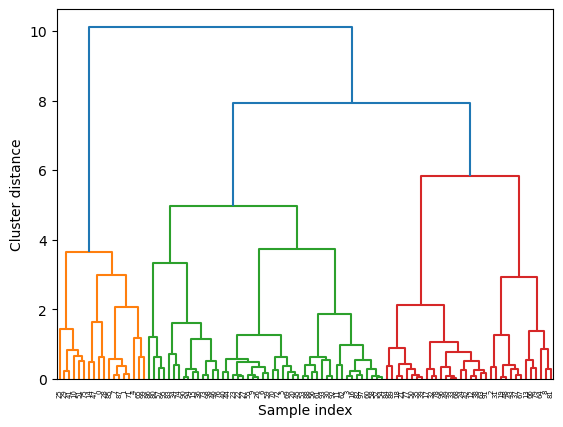

In [6]:
from scipy.cluster.hierarchy import dendrogram, ward
linkage = ward(X_blobs)
dendrogram(linkage)
ax = plt.gca()
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

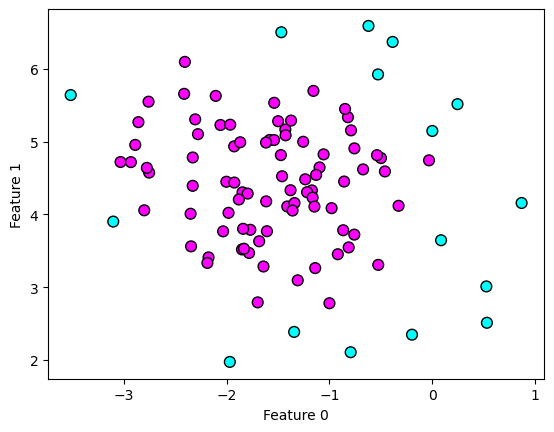

In [7]:
from sklearn.cluster import DBSCAN
db = DBSCAN()
clusters = db.fit_predict(X_blobs)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=clusters, cmap=plt.cm.cool,
            s=60,edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [13]:
#print('聚类的个数为：{}'.format(n_clusters_))
print('聚类的个数为：{}'.format(len(set(clusters))))

聚类的个数为：2


In [9]:
print('聚类标签为：\n{}'.format(clusters))

聚类标签为：
[-1  0 -1  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0 -1 -1  0  0  0  0 -1  0  0 -1  0  0 -1  0  0  0  0  0  0  0  0 -1
  0  0  0 -1]


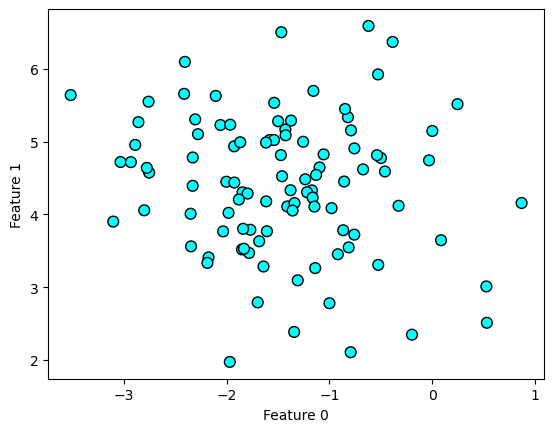

In [10]:
db_1 = DBSCAN(eps = 2)
clusters_1 = db_1.fit_predict(X_blobs)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=clusters_1, cmap=plt.cm.cool,
            s=60,edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [11]:
clusters_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

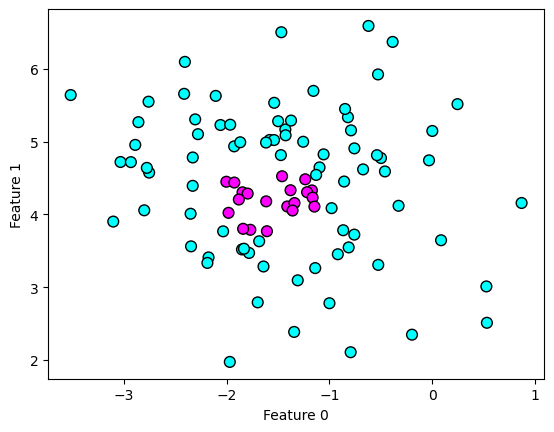

In [14]:
db_2 = DBSCAN(min_samples=20)
clusters_2 = db_2.fit_predict(X_blobs)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=clusters_2, cmap=plt.cm.cool,
            s=60,edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [15]:
clusters_2

array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1, -1,
       -1,  0, -1, -1,  0,  0,  0, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1,  0,  0,  0, -1,  0, -1,  0, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)